In [81]:
import matplotlib.pyplot as plt
import sympy as sym
import sympy.plotting.plot as symplot
import numpy as np
from IPython.display import display, Math
import math

In [6]:
x,a = sym.symbols('x,a')

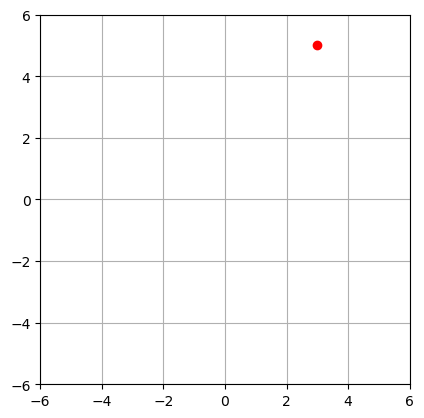

In [13]:
x = 3
y = 5

## CONFIGURACIONES DEL GRAFICO (El orden de los comandos pueden dar graficos diferentes)
# r de rojo y o de punto
plt.plot(x,y,'ro')
plt.axis('square')
# argumentos son xmin,xmax,ymin,ymax

plt.axis([-6,6,-6,6])
plt.grid()

plt.show()

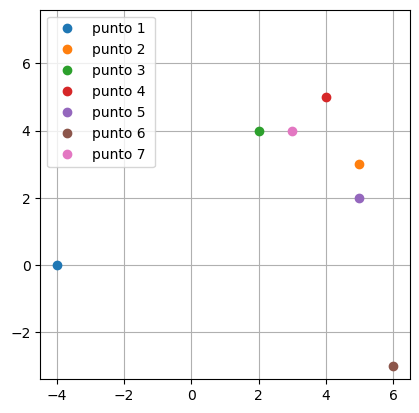

In [19]:
# Ejemplo de grafica con varios puntos
x = [-4,5,2,4,5,6,3]
y = [0,3,4,5,2,-3,4]

for i in range(0, len(x)):
    plt.plot(x[i],y[i],'o', label='punto %s '%(i+1))

# Config graf
plt.axis('square')
plt.grid()
# Lo siguiente es necesario para que muestre el atributo label
plt.legend()

plt.show()

(1.89, 2.1100000000000003)


(1.89, 5.3432678)

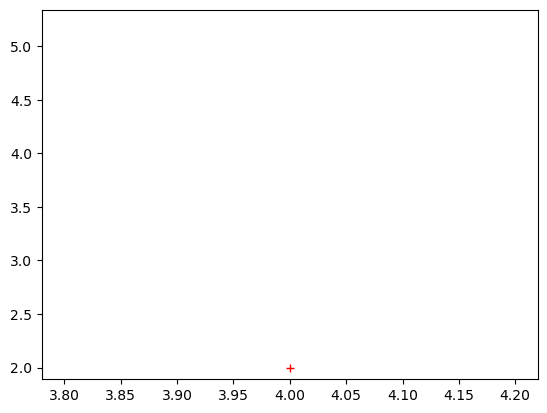

In [21]:
# Forma para acceder a las caracteristicas de un grafico
plt.plot(4,2,'r+')

#para obtener los ejes:
axis = plt.gca()
ylim = axis.get_ylim()

print(ylim)

axis.set_ylim([ylim[0], 5.3432678])

# Dibujar Lineas

Como en matematicas Python define las lineas mediante dos puntos
* Punto de comienzo
* Punto final

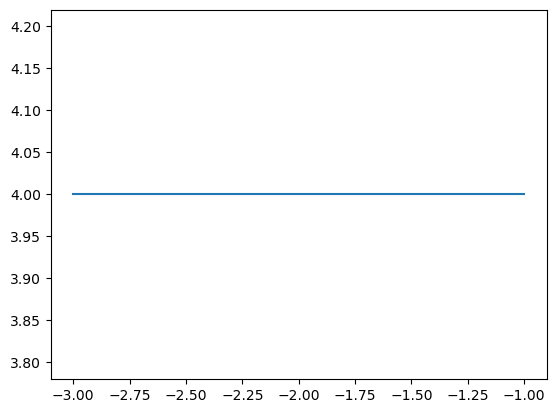

In [23]:
p1 = [-3,-1]
p2 = [4,4]

#Python interpreta p1 como las coordenadas de x y p2 como las de y
plt.plot(p1,p2)
plt.show()


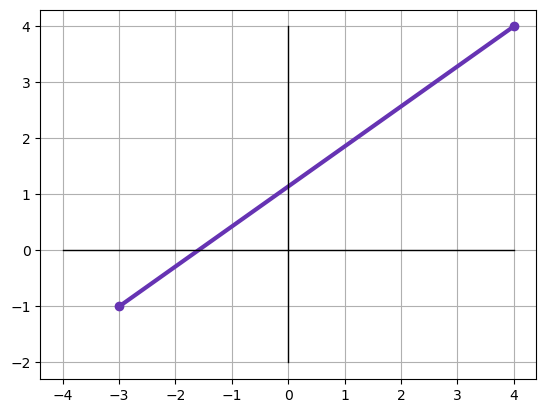

In [41]:
# El siguiente ejemplo muestra una modificacion del color por la forma RVA o RGB
plt.plot([p1[0],p2[0]],[p1[1],p2[1]],color=[.4,.2,.7], linewidth=3)

# Ponemos dos puntos en los extremos
plt.plot(-3,-1,'o',color=[.4,.2,.7])
plt.plot(4,4,'o',color=[.4,.2,.7])

# Dibujamos los ejes de coordenadas
plt.plot([-4,4],[0,0],'k',linewidth=1)
plt.plot([0,0],[4,-2],'k',linewidth=1)

plt.grid()

plt.show()

In [43]:
x = range(-20,20)
x

[range(-20, 20)]

## Representacion de funciones racionales
$$\frac{ax+b}{cx+d}$$

-2
1
2
1
-2
-7
{-3: -7, -2: -2, -1: 1, 0: 2, 1: 1, 2: -2, 3: -7}


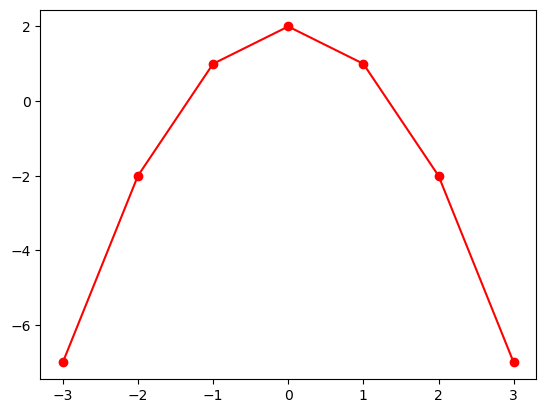

In [98]:
# Una manera es calculando puntos e ir uniendolos con rectas
fun = 2-x**2
sol = {}
#Queremos calcular 7 puntos
for i in range(0,7):
    # Calculamos las coordenadas x,y
    cx = i-3
    cy = fun.subs(x,cx)
    
    sol[cx] = cy # Creamos un dict para las soluciones
    
    # Representamos graficamente linea y punto
    plt.plot(cx,cy,'ro') # Grafica punto
    if len(sol) > 1:
        plt.plot([cx-1,cx],[sol[cx-1],cy], 'r') # Representamos la linea para unir dos puntos
        print(sol[cx])
        
print(sol)
plt.show()

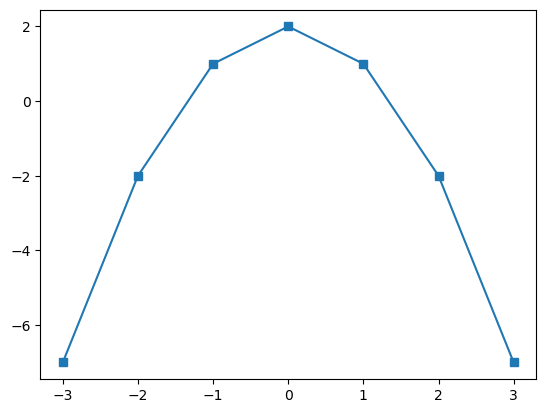

In [102]:
# Una manera mucho mas elegante (Mike X Cohen)
x = range(-3,4)
y = np.zeros(len(x))

for i in range(0,len(x)):
    y[i] = 2-x[i]**2

plt.plot(x,y,'s-')
plt.show()

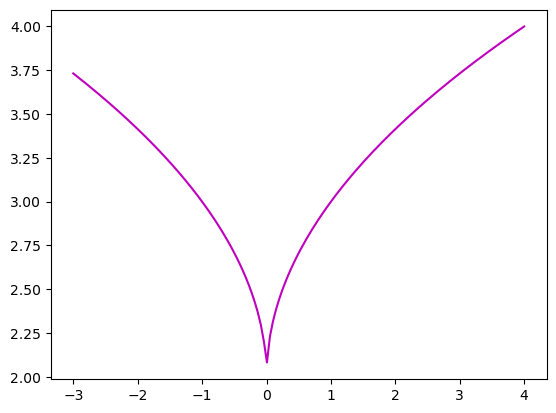

In [122]:
# la siguiente funcion nos genera tantos numeros como le digamos por paramtros
# limite inferior, limite superior, numero de pasos
x = np.linspace(-3,4,150)
y = 2 + np.sqrt(abs(x))

plt.plot(x,y,'m-')

plt.show()

## Graficando con Sympy

Plot object containing:
[0]: cartesian line: x**2 for x over (-10.0, 10.0)


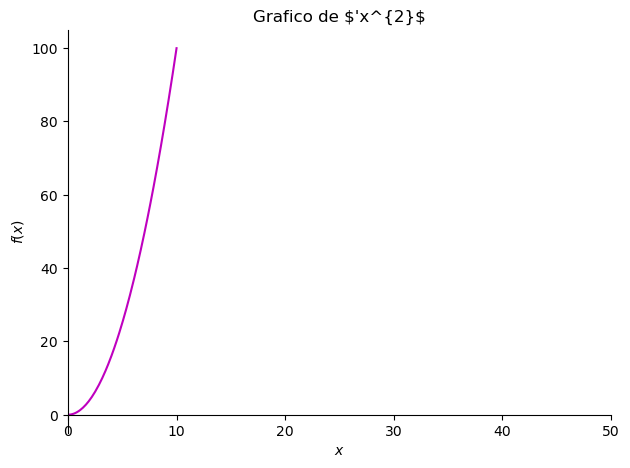

In [166]:
#from sympy.abc import x # No olvidar que tiene que haber una incognita simbolica
y = x**2
p = sym.plotting.plot(y, show=False)
# Como en matplotlib un vez que el grafico es generado no se puede modificar
p.xlim = [0,50]
# Tenemos que acceder a un elemento de p para cambiar sus atributos
p[0].line_color = "m"
print(p)

p.title=f"Grafico de \$'{sym.latex(x**2)}\$"



p.show()

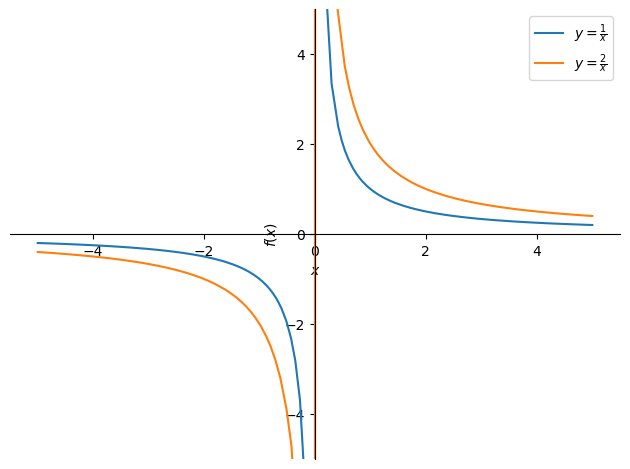

In [58]:
# En este caso como usamos la incognita x en otro grafico necesitamos sustituir su nuevo valor

y = a/x

# Coeficientes de la a
n = 1
n2 = 2

# El segundo parametro sirve para limitar los limites de x
p = symplot(y.subs(a,n),(x,-5,5),show=False)
p[0].label='$y = %s$'%sym.latex(y.subs(a,n)) # Para ponerlo con estilo Latex

p2 = symplot(y.subs(a,n2),(x,-5,5),show=False)
# Introducimos la segunda grafica en el grafico
p.extend(p2)
p[1].label='$y = %s$'%sym.latex(y.subs(a,n2))


p.ylim=[-5,5]
p.legend=True

p.show()

## Generar Images a partir de matrices

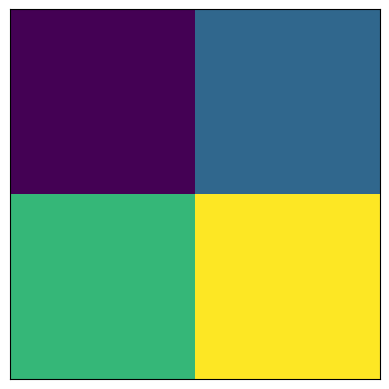

In [93]:
A = [[1,2],[3,4]]

# La siguiente funcion creara una imagen con los coleres de la matriz que le pasamos por parametro
plt.imshow(A)

# borramos el texto de los ejes (supongo que habrá otra forma)
plt.xticks([])
plt.yticks([])
plt.show()

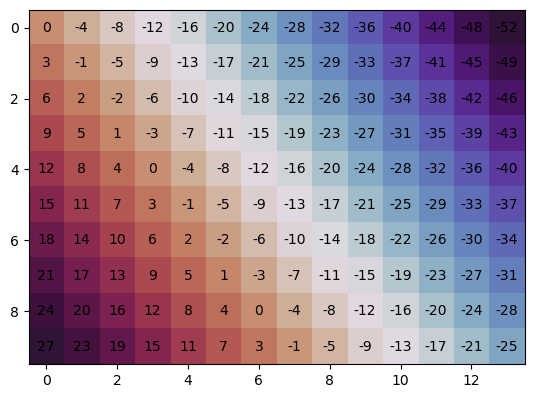

In [131]:
# zeros(filas, columnas) -> Crea una matriz de 0's con tantas filas y columnas como le pasemos por parametro
A = np.zeros((10,14))

# Rellenamos la matriz con los valores de la formula
for i in range(0,np.shape(A)[0]):
    for j in range(0,np.shape(A)[1]):
        A[i,j] = 3*i - 4*j

# Vamos a rellenar cada cuadradado con su valor numerico
for i in range(0,np.shape(A)[0]):
    for j in range(0,np.shape(A)[1]):
        # AVERTENCIA plt cambia el orden de las filas y columnas (usa el eje de coordenadas) respecto a Numpy (columnas,filas)
        plt.text(j,i,int(A[i,j]),horizontalalignment='center',verticalalignment='center')

plt.imshow(A)

plt.set_cmap('twilight_shifted')

plt.show()